In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [8]:
from os import listdir
from os.path import isfile, join
audiodir = 'audio/'
filenames = [f for f in listdir(audiodir) if isfile(join(audiodir, f))]
print(filenames)

['171104__dwsd__kick-gettinglaid.wav', '212208__alexthegr81__tapesnare-15.wav', '250547__almela__kick-bass-drum.wav', '25670__walter-odington__flegm-snare.wav', '264601__veiler__kick-swedish.wav', '264859__veiler__snare-rock-2.wav', '331589__j-zealous__kick-j-zealous-hard-club.aiff', '335925__tr4ck3r__xtrullor-snare-07.wav', '371192__karolist__acoustic-kick.wav', '387186__alexiero-1__ai-snare-20.wav', '465543__mccaslinmusic__kick-drum.wav', '485027__g-e-n-e__snare-3.wav']


In [9]:
feature_set =[]

for i in range(len(filenames)):
  y, sr = librosa.load(audiodir+filenames[i])
  S = np.abs(librosa.stft(y))
  centroid = librosa.feature.spectral_centroid(S=S)
  centroid_mean = np.mean(centroid)
  centroid_std = np.std(centroid)
  
  flatness = librosa.feature.spectral_flatness(S=S)
  flatness_mean = np.mean(flatness)
  flatness_std = np.mean(flatness)
  
  rolloff = librosa.feature.spectral_rolloff(S=S)
  rolloff_mean = np.mean(rolloff)
  rolloff_std = np.mean(rolloff)
  
  features = [centroid_mean, centroid_std, flatness_mean, flatness_std, rolloff_mean, rolloff_std]
  
  feature_set.append(features)

feature_set = np.array(feature_set)
print(feature_set.shape)

(12, 6)


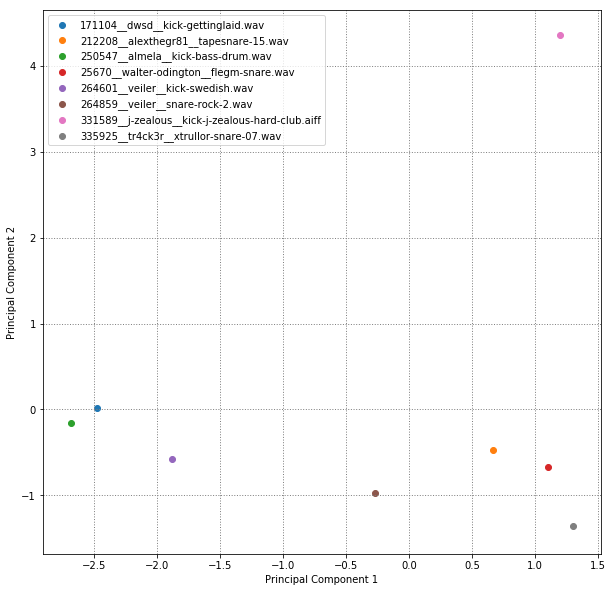

In [14]:
# Scale data so all dimensions have zero mean and variance one.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(feature_set)

# Fit data to PCA
pca = PCA(n_components=2)
pca.fit(scaled_features)
projection = pca.transform(scaled_features)

# Make a beautiful figure!
plt.figure(figsize=(10,10))
plt.grid(color='gray', linestyle=':', linewidth=1)

for i in range(8):
  plt.scatter(projection[i,0], projection[i,1], label=filenames[i])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.legend()
plt.show()

